<a href="https://colab.research.google.com/github/Rohan2139/MALWARE_ANALYSIS1/blob/main/Malware_deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malware Detection Using Deep Learning

### Project is named Hitler System!

He was immediate and emphatic revulsion as that of Nazi leader Adolf Hitler. His hands are stained with the blood of millions killed in the devastation of the Second World War and the horror of the Holocaust.

He used to Identify/ Detect Jews from hidden place used to kill them.

In [ ]:
import pandas as pd
import numpy as np

### Download Datasets : https://raw.githubusercontent.com/Projects-Developer/Malware-Detection-Using-Deep-Learning-Project/main/Malware%20dataset.csv

In [ ]:
data =pd.read_csv("/content/Malware dataset.csv")

In [ ]:
print(data.head(1))

                                                hash  millisecond  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   

  classification  state  usage_counter        prio  static_prio  normal_prio  \
0        malware      0              0  3069378560      14274.0          0.0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0     0.0       0.0  ...     0.0      0.0    120.0              0.0   

           lock     utime  stime  gtime  cgtime  signal_nvcsw  
0  3.204448e+09  380690.0    4.0    0.0     0.0           0.0  

[1 rows x 35 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18283 entries, 0 to 18282
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hash               18283 non-null  object 
 1   millisecond        18283 non-null  int64  
 2   classification     18283 non-null  object 
 3   state              18283 non-null  int64  
 4   usage_counter      18283 non-null  int64  
 5   prio               18283 non-null  int64  
 6   static_prio        18282 non-null  float64
 7   normal_prio        18282 non-null  float64
 8   policy             18282 non-null  float64
 9   vm_pgoff           18282 non-null  float64
 10  vm_truncate_count  18282 non-null  float64
 11  task_size          18282 non-null  float64
 12  cached_hole_size   18282 non-null  float64
 13  free_area_cache    18282 non-null  float64
 14  mm_users           18282 non-null  float64
 15  map_count          18282 non-null  float64
 16  hiwater_rss        182

In [ ]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274.0,0.0,0.0,0.0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274.0,0.0,0.0,0.0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274.0,0.0,0.0,0.0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274.0,0.0,0.0,0.0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274.0,0.0,0.0,0.0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0


In [ ]:
data.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
18278,com.microsoft.amp.apps.bingfinance.apk,278,benign,0,0,3069575168,15681.0,0.0,0.0,0.0,...,0.0,0.0,120.0,1.0,3.204448e+09,384369.0,3.0,0.0,0.0,0.0
18279,com.microsoft.amp.apps.bingfinance.apk,279,benign,0,0,3069575168,15681.0,0.0,0.0,0.0,...,0.0,0.0,120.0,1.0,3.204448e+09,384369.0,3.0,0.0,0.0,0.0
18280,com.microsoft.amp.apps.bingfinance.apk,280,benign,0,0,3069575168,15681.0,0.0,0.0,0.0,...,0.0,0.0,120.0,1.0,3.204448e+09,384369.0,3.0,0.0,0.0,0.0
18281,com.microsoft.amp.apps.bingfinance.apk,281,benign,0,0,3069575168,15681.0,0.0,0.0,0.0,...,0.0,0.0,120.0,1.0,3.204448e+09,384369.0,3.0,0.0,0.0,0.0
18282,com.microsoft.amp.apps.bingfinance.apk,282,benign,0,0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in data.columns:
    print(i)

hash
millisecond
classification
state
usage_counter
prio
static_prio
normal_prio
policy
vm_pgoff
vm_truncate_count
task_size
cached_hole_size
free_area_cache
mm_users
map_count
hiwater_rss
total_vm
shared_vm
exec_vm
reserved_vm
nr_ptes
end_data
last_interval
nvcsw
nivcsw
min_flt
maj_flt
fs_excl_counter
lock
utime
stime
gtime
cgtime
signal_nvcsw


In [ ]:
data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,18283,18283.000000,18283,1.828300e+04,18283.0,1.828300e+04,18282.000000,18282.0,18282.0,18282.0,...,18282.000000,18282.000000,18282.000000,18282.000000,1.828200e+04,18282.000000,18282.000000,18282.000000,18282.0,18282.0
unique,19,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,14283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,493.950829,NaN,1.457475e+05,0.0,3.069485e+09,19616.843726,0.0,0.0,0.0,...,38.265562,1.510283,118.429603,1.649984,3.204448e+09,389118.601630,4.204792,1.884148,0.0,0.0
std,NaN,290.016960,NaN,1.230668e+06,0.0,2.270403e+07,5392.038843,0.0,0.0,0.0,...,75.607990,11.525568,2.763452,3.863595,0.000000e+00,10266.452217,0.812128,3.556622,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.000000e+00,14093.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,374137.000000,3.000000,0.000000,0.0,0.0
25%,NaN,240.000000,NaN,0.000000e+00,0.0,3.069403e+09,15396.000000,0.0,0.0,0.0,...,2.000000,0.000000,120.000000,0.000000,3.204448e+09,381827.000000,4.000000,0.000000,0.0,0.0
50%,NaN,492.000000,NaN,0.000000e+00,0.0,3.069612e+09,16856.000000,0.0,0.0,0.0,...,5.000000,1.000000,120.000000,0.000000,3.204448e+09,386232.000000,4.000000,0.000000,0.0,0.0
75%,NaN,746.000000,NaN,8.192000e+03,0.0,3.069940e+09,22958.000000,0.0,0.0,0.0,...,44.000000,1.000000,120.000000,1.000000,3.204448e+09,390827.000000,5.000000,1.000000,0.0,0.0


In [ ]:
data['classification'] =data.classification.map({'benign':0, 'malware':1})
#1 for malware and 0 for benign

In [ ]:
data["classification"].value_counts()

classification
0    14283
1     4000
Name: count, dtype: int64

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#sns.countplot('hash',data=data)

In [ ]:
#sns.countplot('millisecond',data=data)

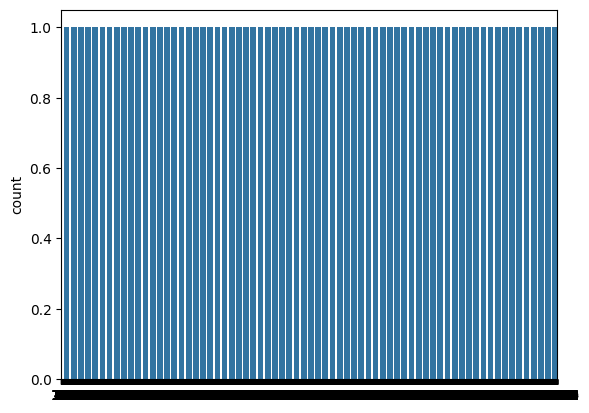

In [ ]:
sns.countplot(data["classification"])
plt.show()

In [ ]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import tensorflow as tf

In [ ]:
input_size = 27

#Number of Outputs
output_size = 2

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [ ]:

result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   #callbacks=[early_stopping],
                   validation_split=0.2)

Epoch 1/20
117/117 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.8536 - val_loss: nan - val_accuracy: 0.7656
Epoch 2/20
117/117 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 3/20
117/117 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 4/20
117/117 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 5/20
117/117 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 6/20
117/117 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 7/20
117/117 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 8/20
117/117 [============================

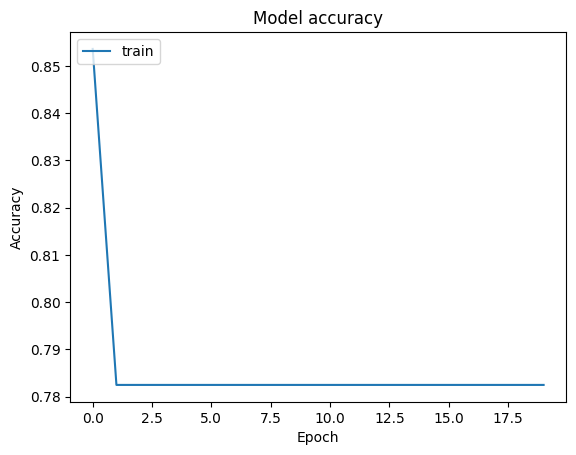

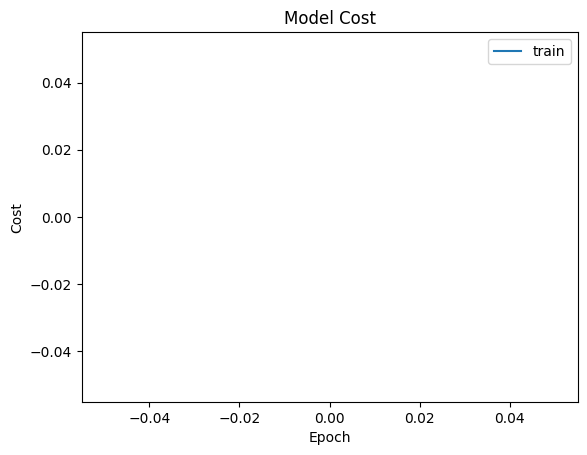

In [ ]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

115/115 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7897

Test loss: nan. Test accuracy: 78.971833%


In [ ]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
117/117 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656
Epoch 12/30
117/117 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7825 - val_loss: nan - val_accuracy: 0.7656


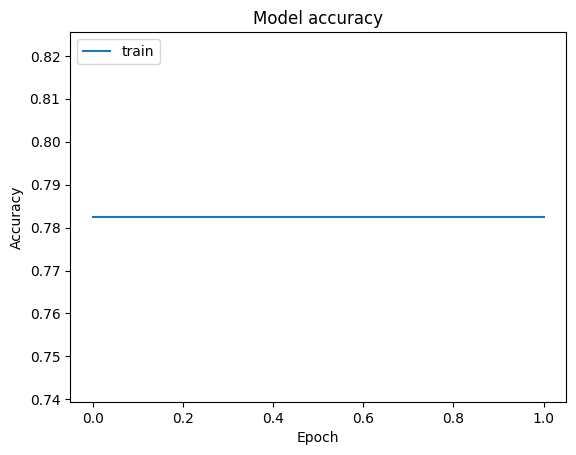

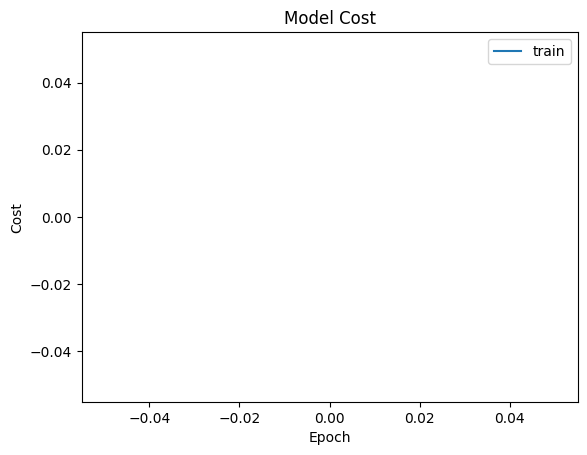

In [ ]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))


115/115 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7897

Test loss: nan. Test accuracy: 78.971833%
